## **Proyecto Mineria de Datos** 

### **Segunda Entrega** 

##### Nancy Alejandra Vinazco Morales - Maria Camila Perilla Gutierrez

## **Explicación Data set**

Este conjunto de datos incluye datos para la estimación de los niveles de obesidad en individuos de los países de México, Perú y Colombia, con base en sus hábitos alimenticios y condición física.
https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
import statsmodels.api as sm
from statistics import mean
from vega_datasets import data
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
obesity = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv', 
                 sep = ',',
                 error_bad_lines=False,
                 )
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## **¿Qué contiene la base de datos?**

In [ ]:
print('Número de registros: ', obesity.shape[0])
print('Número de variables: ', obesity.shape[1])

Número de registros:  2111
Número de variables:  17


+ Renombramiento a algunas de las columnas del dataset para mejor entendimiento.

In [ ]:
obesity.columns = ['Genero', 'Edad', 'Altura', 'Peso', 'Antec_familiares',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'Fuma', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad']
obesity.head()

,Genero,Edad,Altura,Peso,Antec_familiares,FAVC,FCVC,NCP,CAEC,Fuma,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


**Tipos de atributo**

In [ ]:
obesity.dtypes

Genero               object
Edad                float64
Altura              float64
Peso                float64
Antec_familiares     object
FAVC                 object
FCVC                float64
NCP                 float64
CAEC                 object
Fuma                 object
CH2O                float64
SCC                  object
FAF                 float64
TUE                 float64
CALC                 object
MTRANS               object
NObeyesdad           object
dtype: object

## **¿Presencia de datos faltantes?** 

En el dataset no se encuentran datos faltantes, la base esta completa.

In [ ]:
obesity.isnull().sum()

Genero              0
Edad                0
Altura              0
Peso                0
Antec_familiares    0
FAVC                0
FCVC                0
NCP                 0
CAEC                0
Fuma                0
CH2O                0
SCC                 0
FAF                 0
TUE                 0
CALC                0
MTRANS              0
NObeyesdad          0
dtype: int64

## **¿Presencia de datos duplicados?**

**Dataset**

In [ ]:
obesity_D = obesity.copy()

In [ ]:
obesity_D.head()

,Genero,Edad,Altura,Peso,Antec_familiares,FAVC,FCVC,NCP,CAEC,Fuma,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
obesity_D_C = obesity_D
obesity_D_C[obesity_D_C.duplicated()]

,Genero,Edad,Altura,Peso,Antec_familiares,FAVC,FCVC,NCP,CAEC,Fuma,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [ ]:
obesity_dedupped = obesity_D.drop_duplicates()
print(obesity_D.shape)
print(obesity_dedupped.shape)

(2111, 17)
(2087, 17)


Se registro presencia de registros duplicados (se desconoce la naturaleza), en total 24 registros que posteriormente se borraron. 

In [ ]:
obesity_D.shape[0]-obesity_dedupped.shape[0]

24

In [ ]:
obesity = obesity_dedupped.copy()

In [ ]:
print('Número de registros: ', obesity.shape[0])
print('Número de variables: ', obesity.shape[1])

Número de registros:  2087
Número de variables:  17


## **Variables**


### **Genero**

In [ ]:
obesity.Genero.value_counts()

Male      1052
Female    1035
Name: Genero, dtype: int64

In [ ]:
print('De los',obesity.shape[0], 'registros, el',round(obesity.Genero.value_counts()[0]/obesity.shape[0]*100,2), '% son Hombres' )
print('De los',obesity.shape[0], 'registros, el',round(obesity.Genero.value_counts()[1]/obesity.shape[0]*100,2), '% son Mujeres' )

De los 2087 registros, el 50.41 % son Hombres
De los 2087 registros, el 49.59 % son Mujeres


Recategorización

      Hombres = 0 
      Mujeres = 1 

In [ ]:
obesity['Genero'] = obesity['Genero'].map({"Male":0, "Female":1}) 
obesity.head()

,Genero,Edad,Altura,Peso,Antec_familiares,FAVC,FCVC,NCP,CAEC,Fuma,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,1,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,0,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,0,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,0,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### **Edad**

In [ ]:
obesity.Edad.describe()

count    2087.000000
mean       24.353090
std         6.368801
min        14.000000
25%        19.915937
50%        22.847618
75%        26.000000
max        61.000000
Name: Edad, dtype: float64

La variable Edad, esta medida en años enteros, sin embargo, como se dijo anteriormente, el 70% de la base fue simulada, por ende encontramos valores continuos. Con fines académicos y de practica se realizará el ajuste correspondiente:


In [ ]:
obesity['Edad'] = obesity['Edad'].apply(lambda x: round(x, 0))

### **Peso**


En cuanto a la variable **Peso**, se presenta un valor minimo de 39 kg y un valor maximo de 173 kg, en promedio el **Peso** es de 86.58

In [ ]:
obesity.Peso.describe()

count    2087.000000
mean       86.858730
std        26.190847
min        39.000000
25%        66.000000
50%        83.101100
75%       108.015907
max       173.000000
Name: Peso, dtype: float64

### **Altura**

En cuanto a la variable **Altura**, se presenta un valor minimo de 1.45 mts y un valor maximo de 1.98 mts, en promedio el **Altura** es de 1.70 mts

In [ ]:
obesity.Altura.describe()

count    2087.000000
mean        1.702674
std         0.093186
min         1.450000
25%         1.630178
50%         1.701584
75%         1.769491
max         1.980000
Name: Altura, dtype: float64

### **Antecedentes familiares con sobrepeso**

In [ ]:
obesity.Antec_familiares.value_counts()

yes    1722
no      365
Name: Antec_familiares, dtype: int64

In [ ]:
print('De los',obesity.shape[0], 'registros, el',round(obesity.Antec_familiares.value_counts()[1]/obesity.shape[0]*100,2), '% tienen antecedentes familiarires con sobrepeso' )
print('De los',obesity.shape[0], 'registros, el',round(obesity.Antec_familiares.value_counts()[0]/obesity.shape[0]*100,2), '% no tienen antecedentes familiarires con sobrepeso' )

De los 2087 registros, el 17.49 % tienen antecedentes familiarires con sobrepeso
De los 2087 registros, el 82.51 % no tienen antecedentes familiarires con sobrepeso


Recategorización

      No = 0 
      Yes = 1 

In [ ]:
obesity['Antec_familiares'] = obesity['Antec_familiares'].map({"no":0, "yes":1}) 
obesity.head()

,Genero,Edad,Altura,Peso,Antec_familiares,FAVC,FCVC,NCP,CAEC,Fuma,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,1,21.0,1.52,56.0,1,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,0,23.0,1.80,77.0,1,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,0,27.0,1.80,87.0,0,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,0,22.0,1.78,89.8,0,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### **FAVC** 

Esta variable corresponde a si Consume alimentos ricos en calorias con fecuencia. Con posibles valores de respuesta **Si o No**

In [ ]:
obesity.FAVC.value_counts()

yes    1844
no      243
Name: FAVC, dtype: int64

In [ ]:
print('De los',obesity.shape[0], 'registros, el',round(obesity.FAVC.value_counts()[0]/obesity.shape[0]*100,2), '% comen alimentos ricos en calorias con frecuencia' )
print('De los',obesity.shape[0], 'registros, el',round(obesity.FAVC.value_counts()[1]/obesity.shape[0]*100,2), '% no comen alimentos ricos en calorias con frecuencia' )

De los 2087 registros, el 88.36 % comen alimentos ricos en calorias con frecuencia
De los 2087 registros, el 11.64 % no comen alimentos ricos en calorias con frecuencia


Recategorización

      No = 0 
      Yes = 1 

In [ ]:
obesity['FAVC'] = obesity['FAVC'].map({"no":0, "yes":1}) 
obesity.head()

,Genero,Edad,Altura,Peso,Antec_familiares,FAVC,FCVC,NCP,CAEC,Fuma,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,1,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,0,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,0,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,0,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### **FCVC**

Esta variable corresponde a si consume verduras en sus comidas. Posibles respuestas:

    Nunca = 1
    Algunas veces = 2 
    Siempre = 3 

Misma situación de valores simulados

In [ ]:
obesity.FCVC.value_counts()

3.000000    647
2.000000    581
1.000000     33
2.823179      2
2.816460      2
           ... 
1.943130      1
2.530233      1
1.443674      1
2.076689      1
2.562100      1
Name: FCVC, Length: 810, dtype: int64

In [ ]:
obesity['FCVC'] = obesity['FCVC'].apply(lambda x: round(x, 0))

In [ ]:
obesity['FCVC'].value_counts()

2.0    994
3.0    991
1.0    102
Name: FCVC, dtype: int64

In [ ]:
print('De los',obesity.shape[0], 'registros, el',round(obesity['FCVC'].value_counts()[2]/obesity.shape[0]*100,2), '% algunas veces comen verduras en sus comidas' )
print('De los',obesity.shape[0], 'registros, el',round(obesity['FCVC'].value_counts()[3]/obesity.shape[0]*100,2), '% siempre comen verduras en sus comidas' )
print('De los',obesity.shape[0], 'registros, el',round(obesity['FCVC'].value_counts()[1]/obesity.shape[0]*100,2), '% nunca comen verduras en sus comidas' )

De los 2087 registros, el 47.63 % algunas veces comen verduras en sus comidas
De los 2087 registros, el 47.48 % siempre comen verduras en sus comidas
De los 2087 registros, el 4.89 % nunca comen verduras en sus comidas


### **NCP**

Esta variable corresponde a cuántas comidas principales consume al día. Valor de la variable: Número entero 

Misma situación de valores simulados

In [ ]:
obesity.NCP.describe()

count    2087.000000
mean        2.701179
std         0.764614
min         1.000000
25%         2.697467
50%         3.000000
75%         3.000000
max         4.000000
Name: NCP, dtype: float64

In [ ]:
obesity.NCP.value_counts()

3.000000    1199
1.000000     179
4.000000      69
3.985442       2
1.104642       2
            ... 
2.658837       1
1.240424       1
2.057935       1
2.337035       1
2.434347       1
Name: NCP, Length: 635, dtype: int64

In [ ]:
obesity['NCP'] = obesity['NCP'].apply(lambda x: round(x, 0))

In [ ]:
obesity['NCP'].value_counts()

3.0    1466
1.0     296
2.0     176
4.0     149
Name: NCP, dtype: int64

In [ ]:
print('El',round(obesity['NCP'].value_counts()[3]/obesity.shape[0]*100,2), '% tiene 3 comidas principales al día' )
print('El',round(obesity['NCP'].value_counts()[1]/obesity.shape[0]*100,2), '% tiene 1 comida principal al día' )
print('El',round(obesity['NCP'].value_counts()[2]/obesity.shape[0]*100,2), '% tiene 2 comidas principales al día' )
print('El',round(obesity['NCP'].value_counts()[4]/obesity.shape[0]*100,2), '% tiene 4 comidas principales al día' )

El 70.24 % tiene 3 comidas principales al día
El 14.18 % tiene 1 comida principal al día
El 8.43 % tiene 2 comidas principales al día
El 7.14 % tiene 4 comidas principales al día


### **CAEC** 

Esta variable corresponde al consumo de alimentos dentre comidas 

    No
    Algunas veces
    Frecuentemente
    Siempre

In [ ]:
obesity.CAEC.value_counts()

Sometimes     1761
Frequently     236
Always          53
no              37
Name: CAEC, dtype: int64

In [ ]:
print('El',round(obesity.CAEC.value_counts()[0]/obesity.shape[0]*100,2), '% algunas veces' )
print('El',round(obesity.CAEC.value_counts()[1]/obesity.shape[0]*100,2), '% frecuentemente' )
print('El',round(obesity.CAEC.value_counts()[2]/obesity.shape[0]*100,2), '% siempre' )
print('El',round(obesity.CAEC.value_counts()[3]/obesity.shape[0]*100,2), '% Nunca' )

El 84.38 % algunas veces
El 11.31 % frecuentemente
El 2.54 % siempre
El 1.77 % Nunca


Recategorización

    No = 0
    Algunas veces = 1
    Frecuentemente = 2
    Siempre = 3

In [ ]:
obesity['CAEC'] = obesity['CAEC'].map({"no":0, "Sometimes":1, "Frequently":2, "Always":3}) 

### **Fuma**

Variable que corresponde a si fuma o no. Dos posibles respuestas de **si o no**

In [ ]:
obesity.Fuma.value_counts()

no     2043
yes      44
Name: Fuma, dtype: int64

In [ ]:
print('El',round(obesity.Fuma.value_counts()[0]/obesity.shape[0]*100,2), '% no fuma' )
print('El',round(obesity.Fuma.value_counts()[1]/obesity.shape[0]*100,2), '% si fuma' )

El 97.89 % no fuma
El 2.11 % si fuma


Recategorización

      No = 0 
      Yes = 1 

In [ ]:
obesity['Fuma'] = obesity['Fuma'].map({"no":0, "yes":1}) 

### **CH2O**

Esta variable corresponde al cosumo de agua diario. Valor de la variable: 

    Menos de un litro = 1
    Entre 1 y 2 L = 2
    Más de 2 L = 3

Misma situación de valores simulados

In [ ]:
obesity.CH2O.describe()

count    2087.000000
mean        2.004749
std         0.608284
min         1.000000
25%         1.590922
50%         2.000000
75%         2.466193
max         3.000000
Name: CH2O, dtype: float64

In [ ]:
obesity.CH2O.value_counts()

2.000000    445
1.000000    204
3.000000    148
1.636326      3
2.825629      3
           ... 
2.931438      1
2.224914      1
2.724099      1
2.714091      1
2.318736      1
Name: CH2O, Length: 1268, dtype: int64

In [ ]:
obesity['CH2O'] = obesity['CH2O'].apply(lambda x: round(x, 0))

In [ ]:
obesity['CH2O'].value_counts()

2.0    1107
3.0     502
1.0     478
Name: CH2O, dtype: int64

In [ ]:
print('El',round(obesity['CH2O'].value_counts()[2]/obesity.shape[0]*100,2), '% toma entre 1 y 2 litros' )
print('El',round(obesity['CH2O'].value_counts()[3]/obesity.shape[0]*100,2), '% toma más de 2 litros' )
print('El',round(obesity['CH2O'].value_counts()[1]/obesity.shape[0]*100,2), '% toma menos de 1 litro' )


El 53.04 % toma entre 1 y 2 litros
El 24.05 % toma más de 2 litros
El 22.9 % toma menos de 1 litro


### **SCC**

Variable que corresponde aL Monitoreo del consumo de calorías. Dos posibles respuestas de **si o no**

In [ ]:
obesity.SCC.value_counts()

no     1991
yes      96
Name: SCC, dtype: int64

In [ ]:
print('El',round(obesity.SCC.value_counts()[0]/obesity.shape[0]*100,2), '% no hace monitoreo' )
print('El',round(obesity.SCC.value_counts()[1]/obesity.shape[0]*100,2), '% si hace monitoreo' )

El 95.4 % no hace monitoreo
El 4.6 % si hace monitoreo


Recategorización

      No = 0 
      Yes = 1 

In [ ]:
obesity['SCC'] = obesity['SCC'].map({"no":0, "yes":1}) 

### **FAF**

Variable corresponde a Frecuencia de actividad física

    no tengo = 0
    1 o 2 días = 1
    2 o 4 dias = 2
    4 o 5 días = 3

In [ ]:
obesity.FAF.describe()

count    2087.000000
mean        1.012812
std         0.853475
min         0.000000
25%         0.124505
50%         1.000000
75%         1.678102
max         3.000000
Name: FAF, dtype: float64

In [ ]:
obesity.FAF.value_counts()

0.000000    405
1.000000    217
2.000000    182
3.000000     75
1.067817      2
           ... 
0.979306      1
0.246290      1
1.217180      1
1.684582      1
1.170537      1
Name: FAF, Length: 1190, dtype: int64

In [ ]:
obesity['FAF'] = obesity['FAF'].apply(lambda x: round(x, 0))

In [ ]:
obesity['FAF'].value_counts()

1.0    759
0.0    714
2.0    495
3.0    119
Name: FAF, dtype: int64

In [ ]:
print('El',round(obesity['FAF'].value_counts()[1]/obesity.shape[0]*100,2), '% 1 o 2 días a la semana' )
print('El',round(obesity['FAF'].value_counts()[0]/obesity.shape[0]*100,2), '% nunca' )
print('El',round(obesity['FAF'].value_counts()[2]/obesity.shape[0]*100,2), '% 2 o 4 días a la semana' )
print('El',round(obesity['FAF'].value_counts()[3]/obesity.shape[0]*100,2), '% 4 o 5 días a la semana' )


El 36.37 % 1 o 2 días a la semana
El 34.21 % nunca
El 23.72 % 2 o 4 días a la semana
El 5.7 % 4 o 5 días a la semana


### **TUE**

Corresponde al tiempo usado en dispositivos tecnológicos

    0-2 horas = 0
    3-5 horas = 1
    Más de 5 horas = 2

In [ ]:
obesity.TUE.describe()

count    2087.000000
mean        0.663035
std         0.608153
min         0.000000
25%         0.000000
50%         0.630866
75%         1.000000
max         2.000000
Name: TUE, dtype: float64

In [ ]:
obesity.TUE.value_counts()

0.000000    537
1.000000    289
2.000000    108
0.630866      4
1.119877      3
           ... 
0.220029      1
0.052942      1
0.957463      1
1.425852      1
0.857438      1
Name: TUE, Length: 1129, dtype: int64

In [ ]:
obesity['TUE'] = obesity['TUE'].apply(lambda x: round(x, 0))

In [ ]:
obesity['TUE'].value_counts()

0.0    932
1.0    912
2.0    243
Name: TUE, dtype: int64

In [ ]:
print('El',round(obesity['TUE'].value_counts()[0]/obesity.shape[0]*100,2), '% 0 a 2 horas ' )
print('El',round(obesity['TUE'].value_counts()[1]/obesity.shape[0]*100,2), '% 3 a 5 horas' )
print('El',round(obesity['TUE'].value_counts()[2]/obesity.shape[0]*100,2), '% más de 5 horas' )



El 44.66 % 0 a 2 horas 
El 43.7 % 3 a 5 horas
El 11.64 % más de 5 horas


### **CALC**

Corresponde a consumo de alcohol. 

    No bebo
    Algunas veces
    Frecuentemente
    Siempre

In [ ]:
obesity.CALC.value_counts()

Sometimes     1380
no             636
Frequently      70
Always           1
Name: CALC, dtype: int64

In [ ]:
print('El',round(obesity.CALC.value_counts()[0]/obesity.shape[0]*100,2), '% algunas veces' )
print('El',round(obesity.CALC.value_counts()[1]/obesity.shape[0]*100,2), '% nunca' )
print('El',round(obesity.CALC.value_counts()[2]/obesity.shape[0]*100,2), '% frecuentemente' )
print('El',round(obesity.CALC.value_counts()[3]/obesity.shape[0]*100,2), '% siempre' )

El 66.12 % algunas veces
El 30.47 % nunca
El 3.35 % frecuentemente
El 0.05 % siempre


Recategorización

    No bebo = 0
    Algunas veces = 1
    Frecuentemente = 2
    Siempre = 3

In [ ]:
obesity['CALC'] = obesity['CALC'].map({"no":0, "Sometimes":1, "Frequently":2, "Always":3}) 
obesity.head()

,Genero,Edad,Altura,Peso,Antec_familiares,FAVC,FCVC,NCP,CAEC,Fuma,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,Public_Transportation,Normal_Weight
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,Public_Transportation,Normal_Weight
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,Public_Transportation,Normal_Weight
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,Walking,Overweight_Level_I
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,Public_Transportation,Overweight_Level_II


### **MTRANS**

Corresponde a trasporte usado. 

    Public_Transportation
    Automobile
    Walking
    Motorbike
    Bike

In [ ]:
obesity.MTRANS.value_counts()

Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

In [ ]:
print('El',round(obesity.MTRANS.value_counts()[0]/obesity.shape[0]*100,2), '% usa transporte publico' )
print('El',round(obesity.MTRANS.value_counts()[1]/obesity.shape[0]*100,2), '% usa automovil' )
print('El',round(obesity.MTRANS.value_counts()[2]/obesity.shape[0]*100,2), '% camina' )
print('El',round(obesity.MTRANS.value_counts()[3]/obesity.shape[0]*100,2), '% usa motocicleta' )
print('El',round(obesity.MTRANS.value_counts()[4]/obesity.shape[0]*100,2), '% usa bicicleta' )

El 74.65 % usa transporte publico
El 21.85 % usa automovil
El 2.64 % camina
El 0.53 % usa motocicleta
El 0.34 % usa bicicleta


Recategorización

    Public_Transportation = 0 
    Automobile = 1
    Walking = 2
    Motorbike =  3
    Bike = 4

In [ ]:
obesity['MTRANS'] = obesity['MTRANS'].map({"Public_Transportation":0, "Automobile":1, "Walking":2, "Motorbike":3,"Bike":4}) 
obesity.head()

,Genero,Edad,Altura,Peso,Antec_familiares,FAVC,FCVC,NCP,CAEC,Fuma,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,Normal_Weight
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,Normal_Weight
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,Normal_Weight
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,2,Overweight_Level_I
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,Overweight_Level_II


### **NObeyesdad**

Corresponde a los niveles de obesidad. 

    Obesity_Type_I
    Obesity_Type_III
    Obesity_Type_II
    Overweight_Level_II
    Overweight_Level_I
    Normal_Weight
    Insufficient_Weight  

In [ ]:
obesity.NObeyesdad.value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: NObeyesdad, dtype: int64

In [ ]:
print('El',round(obesity.NObeyesdad.value_counts()[0]/obesity.shape[0]*100,2), '% Obesity_Type_I' )
print('El',round(obesity.NObeyesdad.value_counts()[1]/obesity.shape[0]*100,2), '% Obesity_Type_III' )
print('El',round(obesity.NObeyesdad.value_counts()[2]/obesity.shape[0]*100,2), '% Obesity_Type_II' )
print('El',round(obesity.NObeyesdad.value_counts()[3]/obesity.shape[0]*100,2), '% Overweight_Level_II' )
print('El',round(obesity.NObeyesdad.value_counts()[4]/obesity.shape[0]*100,2), '% Overweight_Level_I' )
print('El',round(obesity.NObeyesdad.value_counts()[5]/obesity.shape[0]*100,2), '% Normal_Weight' )
print('El',round(obesity.NObeyesdad.value_counts()[6]/obesity.shape[0]*100,2), '% Insufficient_Weight' )

El 16.82 % Obesity_Type_I
El 15.52 % Obesity_Type_III
El 14.23 % Obesity_Type_II
El 13.9 % Overweight_Level_II
El 13.51 % Overweight_Level_I
El 13.22 % Normal_Weight
El 12.79 % Insufficient_Weight


Recategorización

    Insufficient_Weight = 0
    Normal_Weight = 0
    Overweight_Level_I = 1
    Overweight_Level_II = 1
    Obesity_Type_I = 1
    Obesity_Type_II = 1
    Obesity_Type_III = 1

    

In [ ]:
obesity['NObeyesdad'] = obesity['NObeyesdad'].map(
    {'Insufficient_Weight': 0,
    'Normal_Weight' : 0,
    'Overweight_Level_I' : 1,
    'Overweight_Level_II' : 1,
    'Obesity_Type_I' : 1,
    'Obesity_Type_II' : 1,
    'Obesity_Type_III' : 1}) 
obesity.head()

,Genero,Edad,Altura,Peso,Antec_familiares,FAVC,FCVC,NCP,CAEC,Fuma,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,2,1
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,1


## **Dataset a trabajar**

In [ ]:
obesity_F = obesity.copy()

Se incluirá la variable de IMC que se obtiene con la siguente formula
$$IMC = \frac{Peso}{Altura^2}$$

In [ ]:
obesity_F['IMC'] = obesity_F.Peso/(obesity_F.Altura)**2

In [ ]:
obesity_F.head()

,Genero,Edad,Altura,Peso,Antec_familiares,FAVC,FCVC,NCP,CAEC,Fuma,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,IMC
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,24.386526
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,24.238227
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,23.765432
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,2,1,26.851852
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,1,28.342381


In [ ]:
print('Número de registros: ', obesity_F.shape[0])
print('Número de variables: ', obesity_F.shape[1])

Número de registros:  2087
Número de variables:  18


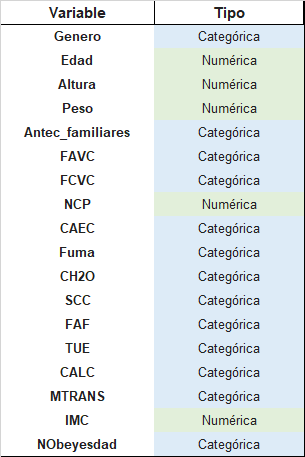

En un primer momento se estudiara la relacion de las variables independientes frente la variable dependiente *NObeyesdad*

## **Relación variables numéricas con la variable a clasificar *NObeyesdad***

La variable que tomaremos como respuesta es $NObesyesdad$ dado que el objetivo es identificar el nivel de obesidad de una persona basada en variables como la edad, el peso, los antecedentes familiares entre otros.

In [ ]:
corr = obesity_F[['Edad', 'Altura','Peso','NCP','IMC','NObeyesdad']].corr()
corr

,Edad,Altura,Peso,NCP,IMC,NObeyesdad
Edad,1.000000,-0.031972,0.199063,-0.054799,0.241897,0.334871
Altura,-0.031972,1.000000,0.457468,0.228681,0.124466,0.113124
Peso,0.199063,0.457468,1.000000,0.088368,0.934494,0.698291
NCP,-0.054799,0.228681,0.088368,1.000000,0.022066,-0.109019
IMC,0.241897,0.124466,0.934494,0.022066,1.000000,0.744935
NObeyesdad,0.334871,0.113124,0.698291,-0.109019,0.744935,1.000000


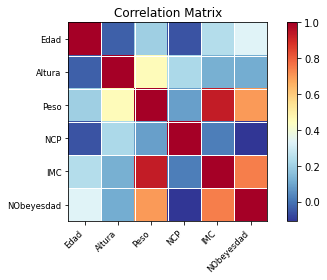

In [ ]:
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

## **Relación variables categóricas con la variable a clasificar *NObeyesdad***

Genero

In [ ]:
cross_table1 = pd.crosstab(index=obesity_F['Genero'],
            columns=obesity_F['NObeyesdad'], margins=True)
cross_table2 = pd.crosstab(index=obesity_F['Antec_familiares'],
            columns=obesity_F['NObeyesdad'], margins=True)
cross_table3 = pd.crosstab(index=obesity_F['FAVC'],
            columns=obesity_F['NObeyesdad'], margins=True)
cross_table4 = pd.crosstab(index=obesity_F['FCVC'],
            columns=obesity_F['NObeyesdad'], margins=True)
cross_table5 = pd.crosstab(index=obesity_F['CAEC'],
            columns=obesity_F['NObeyesdad'], margins=True)
cross_table6 = pd.crosstab(index=obesity_F['Fuma'],
            columns=obesity_F['NObeyesdad'], margins=True)
cross_table7 = pd.crosstab(index=obesity_F['CH2O'],
            columns=obesity_F['NObeyesdad'], margins=True)
cross_table8 = pd.crosstab(index=obesity_F['SCC'],
            columns=obesity_F['NObeyesdad'], margins=True)
cross_table9 = pd.crosstab(index=obesity_F['FAF'],
            columns=obesity_F['NObeyesdad'], margins=True)
cross_table10 = pd.crosstab(index=obesity_F['TUE'],
            columns=obesity_F['NObeyesdad'], margins=True)
cross_table11 = pd.crosstab(index=obesity_F['CALC'],
            columns=obesity_F['NObeyesdad'], margins=True)
cross_table12 = pd.crosstab(index=obesity_F['MTRANS'],
            columns=obesity_F['NObeyesdad'], margins=True)

In [ ]:
c,p1,d,f = stats.chi2_contingency(cross_table1)
c,p2,d,f = stats.chi2_contingency(cross_table2)
c,p3,d,f = stats.chi2_contingency(cross_table3)
c,p4,d,f = stats.chi2_contingency(cross_table4)
c,p5,d,f = stats.chi2_contingency(cross_table5)
c,p6,d,f = stats.chi2_contingency(cross_table6)
c,p7,d,f = stats.chi2_contingency(cross_table7)
c,p8,d,f = stats.chi2_contingency(cross_table8)
c,p9,d,f = stats.chi2_contingency(cross_table9)
c,p10,d,f = stats.chi2_contingency(cross_table10)
c,p11,d,f = stats.chi2_contingency(cross_table11)
c,p12,d,f = stats.chi2_contingency(cross_table12)

print('Genero ------------ Pvalor:' , round(p1,5))
print('Antec_familiares -- Pvalor:' , round(p2,5))
print('FAVC -------------- Pvalor:' , round(p3,5))
print('FCVC -------------- Pvalor:' , round(p4,5))
print('CAEC -------------- Pvalor:' , round(p5,5))
print('Fuma -------------- Pvalor:' , round(p6,5))
print('CH2O -------------- Pvalor:' , round(p7,5))
print('SCC --------------- Pvalor:' , round(p8,5))
print('FAF --------------- Pvalor:' , round(p9,5))
print('TUE --------------- Pvalor:' , round(p10,5))
print('CALC -------------- Pvalor:' , round(p11,4))
print('MTRANS ------------ Pvalor:' , round(p12,5))


Genero ------------ Pvalor: 0.02386
Antec_familiares -- Pvalor: 0.0
FAVC -------------- Pvalor: 0.0
FCVC -------------- Pvalor: 0.02762
CAEC -------------- Pvalor: 0.0
Fuma -------------- Pvalor: 0.95077
CH2O -------------- Pvalor: 0.0
SCC --------------- Pvalor: 0.0
FAF --------------- Pvalor: 0.0
TUE --------------- Pvalor: 0.02066
CALC -------------- Pvalor: 0.0
MTRANS ------------ Pvalor: 0.0


+ Si el p-valor < 0.05, hay diferencias significativas. Es decir, hay relación entre las variables 

+ Si el p-valor > 0.05, no hay diferencias significativas. Es decir, no hay relación entre las variables

De acuerdo al test Chi - cuadrado, al parecer todas las variables guardan una relación con nuestra variable objetivo NObeyesday, exepto la variable *Fumar*. En un primer momento se construira el modelo con todas las variables explicativas. 

# Variables independientes seleccionadas

Luego de realizar pruebas se concluyo que se utilizaran todas las variables del data set, exceptuando la variable de si fuma o no, pues esta no resulto ser significativa estadisticamente.

# Variable a categorizar 

La variable que vamos a categorizar es $NObesyesdad$ dado que el objetivo del proyecto es identificar si una persona es obesa o no con base en variables como la edad, el peso, el indice de masa corporal, los antecedentes familiares de sobre peso, la frecuencia con que realizan ejercicio físico, entre otras.

# Algoritmo seleccionado

Se realizo una regresión logística dado que el interes del proyecto es saber cual es la probabilidad de que un individuo con ciertas caracteristicas pertenezca a una clase especifica, que para efectos de este trabajo es si la persona es obesa o no.

*Modelo con todos los datos del dataset*

In [ ]:
# ajustar un modelo de regresión logística y almacenar las predicciones de clase
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
feature_cols = ['Genero', 'Edad', 'Altura', 'Peso', 'Antec_familiares', 'FAVC', 'FCVC', 'NCP', 'CAEC','CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'IMC']
X = obesity_F[feature_cols]
y = obesity_F.NObeyesdad
logreg.fit(X, y)
obesity_F['obesidad'] = logreg.predict(X)
# almacenar las probabilidades previstas de la clase 1
obesity_F['obesidad_prob'] = logreg.predict_proba(X)[:, 1]

Viendo algunas de las predicciones podemos observar que el modelo generaliza bien, pues los valores que predice son muy similares a los valores reales

In [ ]:
# examinar algunas predicciones de ejemplo
obesity_F.head()

,Genero,Edad,Altura,Peso,Antec_familiares,FAVC,FCVC,NCP,CAEC,Fuma,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,IMC,obesidad,obesidad_prob
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,24.386526,0,0.110068
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,24.238227,0,0.049864
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,23.765432,0,0.001481
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,2,1,26.851852,1,0.999434
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,1,28.342381,1,1.000000


Si miramos un caso en particular

In [ ]:
# examinar algunas predicciones de ejemplo
print(logreg.predict_proba([[1,21,1.62,64,1,0,2,3,1,2,0,0,1,0,0,24.386526]]))

[[0.88993186 0.11006814]]


La probabilidad de que una persona con estas caracterisiticas caiga en la categoria 0 es de 0.8693 y la probabilidad de que caiga en la categoria 1 es de 0.1306

In [ ]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(obesity_F['NObeyesdad'], obesity_F['obesidad'])))

RMSE: 0.04894674065940168


Para el modelo que realizamos con todas las observaciones tenemos un RMSE de 0.0489 lo que es bueno ya que el modelo generaliza bien sin embargo aun queda la pregunta de que tan bien va a predecir cuando se enfrente a datos que nunca ha visto.

# Cambiando alguno de los hiperparámetros

Cambiando el hiper parámetro de solver

In [ ]:
# ajustar un modelo de regresión logística y almacenar las predicciones de clase
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='sag',C=1e9,fit_intercept=False)
feature_cols = ['Genero', 'Edad', 'Altura', 'Peso', 'Antec_familiares', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'Fuma', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'IMC']
X = obesity_F[feature_cols]
y = obesity_F.NObeyesdad
logreg.fit(X, y)
obesity_F['obesidad'] = logreg.predict(X)
# almacenar las probabilidades previstas de la clase 1
obesity_F['obesidad_prob'] = logreg.predict_proba(X)[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
# examinar algunas predicciones de ejemplo
obesity_F.head()

,Genero,Edad,Altura,Peso,Antec_familiares,FAVC,FCVC,NCP,CAEC,Fuma,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,IMC,obesidad,obesidad_prob
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,24.386526,1,0.788622
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,24.238227,0,0.197136
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,23.765432,1,0.677352
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,2,1,26.851852,1,0.737780
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,1,28.342381,1,0.995960


In [ ]:
# examinar algunas predicciones de ejemplo
print(logreg.predict_proba([[1,21,1.62,64,1,0,2,3,1,0,2,0,0,1,0,0,24.386526]]))

[[0.21137772 0.78862228]]


In [ ]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(obesity_F['NObeyesdad'], obesity_F['obesidad'])))

RMSE: 0.24571068803310914


# Modelo con particion del data set

In [ ]:
# define X and y
feature_cols = ['Genero', 'Edad', 'Altura', 'Peso', 'Antec_familiares', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'IMC']
X = obesity_F[feature_cols]
y = obesity_F.NObeyesdad

In [ ]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1565, 16) (522, 16) (1565,) (522,)


In [ ]:
#Estimar los modelos con el conjunto de entrenamiento
clf1_tt = LogisticRegression()
clf1_tt.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Crear el metodo K fold CV
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=666, shuffle=True)

In [ ]:
# Estimar el modelo en cada uno de los k folds
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf1_tt, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

In [ ]:
# Calcular el mse para el modelo (https://www.kaggle.com/questions-and-answers/154600)
print('MSE regresión RMSE:', np.sqrt(abs(np.mean(scores))))

MSE regresión RMSE: 0.14518242050149208


Para el modelo donde se realizo validacion crusada de K-Fold tenemos un RMSE de 0.1451 que es mayor que el del modelo que usa todas las predicciones para generalizar, y a pesar de esto prodriamos decir que las predicciones por este modelo serian mas confiables debido a que a pesar de que ve todas las observaciones estas entran como train y como test

# Predicciones con el conjunto de validación

In [ ]:
# Evaluar el modelo
yhat = clf1_tt.predict(X_test)

Realizando las predicciones con los datos de entrenamiento tenemos el siguiente conjunto de datos que evaluaremos a continuación

In [ ]:
print(yhat)

[0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0
 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1
 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1
 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1
 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1
 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 

# Evaluación de modelo

Para evaluar el modelo haremos uso de la matriz de confusión que nos permite conocer cuantas observaciones del conjuto de validación fueron clasificadas correctamente

In [ ]:
from sklearn.metrics import confusion_matrix
matriz  = confusion_matrix(y_test,yhat)
print(matriz)

[[135   7]
 [  1 379]]


La matriz nos dice que 135 datos fueron predichos de manera correcta para la categoria 1 y que 379 fueron predichos de manera correcta para la categoria 0

La cantidad de datos que pertenecian a la categoria de 0 y el modelo los predijo como 1 fueron 7, es decir de manera errada

Y la cantidad de datos que pertenecian a la categoria de 1 y el modelo los predijo como 0 fue de 1, es decir de manera errada

Pero en general podemos afirmar con base en la matriz de confusión que nuestro modelo predice bien

Veremos otras metricas para la evaluación del modelo

* Presición del modelo

In [ ]:
# Presición del algoritmo
from sklearn.metrics import precision_score
prescicion = precision_score(y_test,yhat)
print(prescicion)

0.9818652849740933


El resultado de la presición es de 0.98 esto coincide con el resultado de la matriz de confusion demostrando que nuestro modelo es bastante bueno

* Exactitud del modelo

In [ ]:
# exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test,yhat)
print(exactitud)

0.9846743295019157


Nuestro modelo tiene una exactitud de 0.9846 lo que quiere decir que es un buen modelo

* Sensibilidad del modelo

In [ ]:
# sensibilidad del modelo
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test,yhat)
print(sensibilidad)


0.9973684210526316


Nuestro modelo tiene una sensibilidad del 0.9973 lo que quiere decir que es un buen modelo

* Curva de ROC_ AUC del modelo

In [ ]:
# Calculo de la curva ROC _ AUC del modelo 
from sklearn.metrics import roc_auc_score
curvaROC = roc_auc_score(y_test,yhat)
print(curvaROC)


0.9740363232023721


Nuestro modelo tiene un valor de 0.9740 de AUC lo que quiere decir que es un buen modelo

# Justificación modelo escogido

Se selecciono el algoritmo de K_Fold porque es el algoritmo que tiene lo mejor de loocv y de la validación simple, se uso la metrica del error cuadratico medio de los modelos, ya que este nos permite comparar los valores reales contra los valores predichos. 

El modelo que seleccionamos es el modelo que se realizo con el algoritmo de K-Fold pues a pesar de que no es el modelo con el menor RMSE basado en la matriz de confusión y las demás metricas podemos concluir que es un buen modelo ya que predice bien.

Podriamos mejorar de nuestro modelo la reducción de variables explicativas, tratando de agruparlas sin embargo será una consideración posterior.